In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
tempCmax_df = pd.read_excel(r"C:\Users\hp\Desktop\sso_thesis\weather\Tmax-18.xlsx")
tempCmax_df.drop(columns = ["Unnamed: 0"], inplace = True)
#print(tempCmax_df.shape)
for i in range(33):
    tempCmax_df.iloc[:, i] = pd.to_numeric(tempCmax_df.iloc[:, i])
tempCmax_df = tempCmax_df.transpose()
tempCmax_df

avg_temp_max = tempCmax_df.mean(axis = 1)
avg_temp_max = pd.DataFrame(avg_temp_max)
avg_temp_max.rename(columns = {0 : "temperature"}, inplace = True)
avg_temp_max

,temperature
2018-01-01,25.846875
2018-01-02,25.475000
2018-01-03,24.134375
2018-01-04,22.196875
2018-01-05,23.468750
...,...
2018-12-27,24.715625
2018-12-28,23.925000
2018-12-29,23.653125
2018-12-30,25.800000


In [3]:
tempCmin_df = pd.read_excel(r"C:\Users\hp\Desktop\sso_thesis\weather\Tmin-18.xlsx")
tempCmin_df.drop(columns = ["Unnamed: 0"], inplace = True)
#print(tempCmin_df.shape)
for i in range(33):
    tempCmin_df.iloc[:, i] = pd.to_numeric(tempCmin_df.iloc[:, i])
tempCmin_df = tempCmin_df.transpose()
tempCmin_df

avg_temp_min = tempCmin_df.mean(axis = 1)
avg_temp_min = pd.DataFrame(avg_temp_min)
avg_temp_min.rename(columns = {0 : "temperature"}, inplace = True)
avg_temp_min

,temperature
2018-01-01,15.518750
2018-01-02,16.359375
2018-01-03,14.403125
2018-01-04,11.190625
2018-01-05,10.884375
...,...
2018-12-27,11.059375
2018-12-28,10.537500
2018-12-29,8.934375
2018-12-30,9.809375


In [4]:
avg_temp = pd.DataFrame()
avg_temp["tmax"] = avg_temp_max.iloc[:, 0]
avg_temp["tmin"] = avg_temp_min.iloc[:, 0]
avg_temp["avg"] = avg_temp.mean(axis = 1)
avg_temp["sd"] = abs(avg_temp_max.iloc[:, 0] - avg_temp_min.iloc[:, 0])
avg_temp.drop(columns = ["tmax", "tmin"], inplace = True)
avg_temp

,avg,sd
2018-01-01,20.682813,10.328125
2018-01-02,20.917188,9.115625
2018-01-03,19.268750,9.731250
2018-01-04,16.693750,11.006250
2018-01-05,17.176562,12.584375
...,...,...
2018-12-27,17.887500,13.656250
2018-12-28,17.231250,13.387500
2018-12-29,16.293750,14.718750
2018-12-30,17.804688,15.990625


In [5]:
#avg_temp.to_csv(r"C:\Users\hp\Desktop\sso_thesis\weather\2018_avg_sd.csv")

In [26]:
df = pd.read_csv(r"C:\Users\hp\Desktop\sso_thesis\weather\2021_avg_sd.csv")
df.set_index("Unnamed: 0", inplace = True)
df["avg"] = df["avg"]/float(np.amax(df.iloc[:, [0]]))
df["sd"] = df["sd"]/float(np.amax(df.iloc[:, [1]]))
df["avg load"] = df["avg load"]/np.amax(df["avg load"])
df["sd load"] = df["sd load"]/np.amax(df["sd load"])
df

,avg,sd,avg load,sd load
Unnamed: 0,,,,
01-01-21 00:00,0.594886,0.887486,0.511408,0.338211
01-02-21 00:00,0.596086,0.883151,0.535258,0.484916
01-03-21 00:00,0.611052,0.897475,0.565629,0.430889
01-04-21 00:00,0.631920,0.911233,0.567596,0.430385
01-05-21 00:00,0.656481,0.913871,0.577146,0.440699
...,...,...,...,...
26-12-21,0.612396,0.784018,0.595310,0.431205
27-12-21,0.617912,0.751037,0.612676,0.474017
28-12-21,0.620695,0.772899,0.617760,0.448220


In [27]:
#df.to_csv(r"C:\Users\hp\Desktop\sso_thesis\weather\2021_temp_load_normalized.csv")

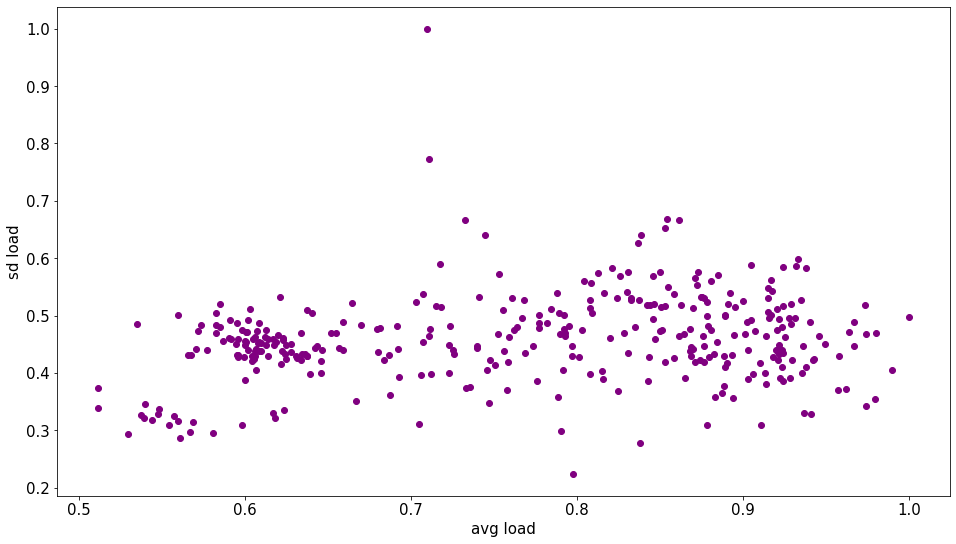

In [36]:
#avg vs avg load
#sd vs avg load
#avg load vs sd load
#avg vs sd load
#sd vs sd load
plt.figure(figsize = (16, 9))
plt.scatter(df["avg load"], df["sd load"], color = "purple")
plt.tick_params(axis = "x", labelsize = 15)
plt.tick_params(axis = "y", labelsize = 15)
plt.xlabel("avg load", fontsize = 15)
plt.ylabel("sd load", fontsize = 15)

plt.savefig(r"C:\Users\hp\Desktop\sso_thesis\cluster_plots\2021_avgload_sdload.png")

In [29]:
import math

avg_load_minus_total_avg = (df["avg load"] - df["avg load"].mean(axis = 0))
avg_load_minus_total_avg_squared = sum(avg_load_minus_total_avg**2)

avg_temp_minus_total_avg = (df["avg"] - df["avg"].mean(axis = 0))
avg_temp_minus_total_avg_squared = sum(avg_temp_minus_total_avg**2)

sd_load_minus_total_avg = (df["sd load"] - df["sd load"].mean(axis = 0))
sd_load_minus_total_avg_squared = sum(sd_load_minus_total_avg**2)

sd_temp_minus_total_avg = (df["sd"] - df["sd"].mean(axis = 0))
sd_temp_minus_total_avg_squared = sum(sd_temp_minus_total_avg**2)

al_mta_mul_at_mta = avg_load_minus_total_avg*avg_temp_minus_total_avg
al_mta_mul_sl_mta = avg_load_minus_total_avg*sd_load_minus_total_avg
al_mta_mul_st_mta = avg_load_minus_total_avg*sd_temp_minus_total_avg
sl_mta_mul_at_mta = sd_load_minus_total_avg*avg_temp_minus_total_avg
sl_mta_mul_st_mta = sd_load_minus_total_avg*sd_temp_minus_total_avg

#Karl Pearson's Correlation
kpc_avgload_avgtemp = sum(al_mta_mul_at_mta)/math.sqrt(avg_load_minus_total_avg_squared*avg_temp_minus_total_avg_squared)
print("Karl Pearson's Correlation for avg_load vs avg_temp: ", kpc_avgload_avgtemp)
kpc_avgload_sdtemp = sum(al_mta_mul_st_mta)/math.sqrt(avg_load_minus_total_avg_squared*sd_temp_minus_total_avg_squared)
print("Karl Pearson's Correlation for avg_load vs sd_temp: ", kpc_avgload_sdtemp)
kpc_sdload_sdtemp = sum(sl_mta_mul_st_mta)/math.sqrt(sd_load_minus_total_avg_squared*sd_temp_minus_total_avg_squared)
print("Karl Pearson's Correlation for sd_load vs sd_temp: ", kpc_sdload_sdtemp)
kpc_sdload_avgtemp = sum(sl_mta_mul_at_mta)/math.sqrt(sd_load_minus_total_avg_squared*avg_temp_minus_total_avg_squared)
print("Karl Pearson's Correlation for sd_load vs avg_temp: ", kpc_sdload_avgtemp)
kpc_avgload_sdload = sum(al_mta_mul_sl_mta)/math.sqrt(avg_load_minus_total_avg_squared*sd_load_minus_total_avg_squared)
print("Karl Pearson's Correlation for sd_load vs avg_load: ", kpc_avgload_sdload)

Karl Pearson's Correlation for avg_load vs avg_temp:  0.8881239676962621
Karl Pearson's Correlation for avg_load vs sd_temp:  -0.5351967543486597
Karl Pearson's Correlation for sd_load vs sd_temp:  -0.03861357375397968
Karl Pearson's Correlation for sd_load vs avg_temp:  0.21932913701298629
Karl Pearson's Correlation for sd_load vs avg_load:  0.21375450507861202


r = Karl Pearson's Correlation: Commenting guide

r = +1; fully positive correlation (almost indicating causation)
r = -1; fully negative correlation (almost indicating inverse causation)

r >= 0.8; highly positive correlation
r <= -0.8; highly negative correlation

0.2 < r < 0.8; medium level positive correlation
-0.8 < r < -0.2; medium level negative correlation

0 < r <= 0.2; low level positive correlation
-0.2 <= r < 0; low level negative correlation

r = 0; no correlation